<a href="https://colab.research.google.com/github/kelvinfoo123/Survival-Analysis/blob/main/Haberman_Survival_Analysis_(Kaplan_Meier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

In [5]:
data = pd.read_csv("haberman.csv")
data.head()

,Age,Operation_yr,axil_nodes,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## **Modeling**

In [9]:
!pip install lifelines 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 4.3 MB/s 
     |████████████████████████████████| 77 kB 6.0 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=2256760d3e32c0e17be1967f2cd265e63f5a5e29d50e01122d401123542109ad
  Stored in directory: /root/.cache/pip/wheels/16/a2/b6/582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built autograd-gamma


In [10]:
from lifelines import CoxPHFitter 
from lifelines import KaplanMeierFitter 

In [13]:
time = data.Age 
event = data.surv_status

km = KaplanMeierFitter()

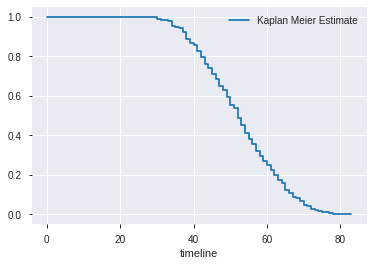

In [19]:
km.fit(time, event, label = "Kaplan Meier Estimate")
km.plot(ci_show = False)

Generally, survival probability decreases as age increases.

In [20]:
data['year_since_operation'] = 100 - data['Operation_yr']
data.head()

,Age,Operation_yr,axil_nodes,surv_status,year_since_operation
0,30,64,1,1,36
1,30,62,3,1,38
2,30,65,0,1,35
3,31,59,2,1,41
4,31,65,4,1,35


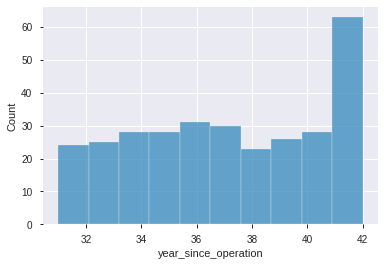

In [21]:
sns.histplot(data['year_since_operation'])

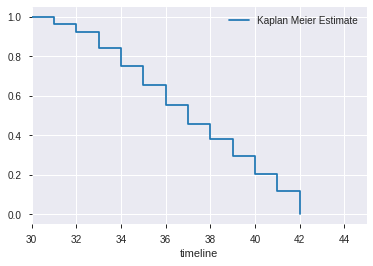

In [24]:
km = KaplanMeierFitter()

time = data.year_since_operation 
event = data.surv_status

km.fit(time, event, label = "Kaplan Meier Estimate")
plt.xlim([30,45])
km.plot(ci_show = False)

Generally, as the time since operation increases, survival probability decreases. 

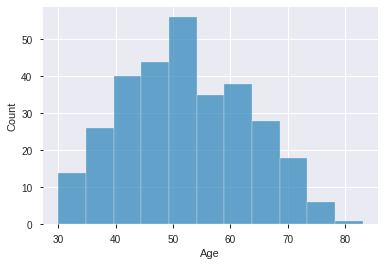

In [25]:
sns.histplot(data['Age'])

In [29]:
data['Age_cat'] = np.where(data['Age'] <= 50, 'Young', 'Old')
data.head()

,Age,Operation_yr,axil_nodes,surv_status,year_since_operation,Age_cat
0,30,64,1,1,36,Young
1,30,62,3,1,38,Young
2,30,65,0,1,35,Young
3,31,59,2,1,41,Young
4,31,65,4,1,35,Young


In [31]:
km = KaplanMeierFitter()

groups = data['Age_cat']
Young = (groups == 'Young')
Old = (groups == 'Old')

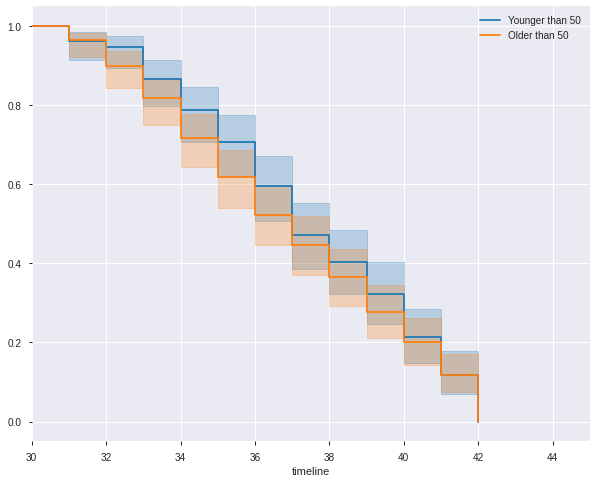

In [34]:
time = data.year_since_operation 
event = data.surv_status

plt.figure(figsize = (10,8))
plt.xlim([30,45])
km.fit(time[Young], event[Young], label = 'Younger than 50')
a1 = km.plot()

km.fit(time[Old], event[Old], label = 'Older than 50')
km.plot(ax = a1)

As time since operation passes, people younger than 50 have a higher survival probability.